In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pylab as plt
# %matplotlib inline
import pre

# 支持中文
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置画图的中文字体显示
plt.rcParams['axes.unicode_minus'] = False   #显示负号
plt.rcParams['font.size'] = 12

#隐藏红色警示框
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

seed = 123

In [2]:
original_plc_df = pd.read_csv('plc_data.csv')
original_huayan_df = pd.read_excel('huayan_data.xlsx')
original_huayan_df = original_huayan_df[['时间', '1系列1段旋流器A组溢流浓度/%', '1系列1段旋流器A组溢流粒度/-200目']]
original_plc_df.loc[:, '时间'] = pd.to_datetime(original_plc_df.loc[:,'时间'])
pre.degree(original_plc_df, '1s')
pre.degree(original_huayan_df, '1h')

### Baseline

In [3]:
df0 = original_plc_df[['时间','给料皮带G1_矿量反馈']]
df1 = original_plc_df[['时间','返料皮带F3_电流', '返料皮带F3_矿量']]
df2 = original_plc_df[['时间','半自磨_功率1', '半自磨_功率2','半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', 
                       '半自磨_给矿水阀位','半自磨_排矿水流量', '直线筛_冲筛水流量']]
df3 = original_plc_df[['时间','一段泵池_液位', '一段泵池_补加水流量反馈']]
df4 = original_plc_df[['时间','一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈']]

df5 = original_plc_df[['时间','一段旋流器1_压力']]
df6 = original_plc_df[['时间','球磨机_功率1','球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位']]

In [4]:
df_set = [df0,df1,df2,df3,df4,df5,df6]
shift = [0,0,0,0,0,0,0]
freq = ['5min','5min','5min','5min','5min','5min','5min']
for i in range(7):
    lll = len(df_set[i].columns)
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'] - timedelta(minutes=shift[i])
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'].dt.round(freq[i])
    df_set[i] = df_set[i].groupby("时间").mean().reset_index()
    df_set[i] = df_set[i].merge(original_huayan_df, how="left", on="时间").dropna(axis = 0,how = 'any')

    df_set[i] = df_set[i].iloc[:,:lll]
    df_set[i].reset_index(inplace=True,drop=True)

In [5]:
from functools import reduce

df_list = [df_set[0],df_set[1],df_set[2],df_set[3],df_set[4],df_set[5],df_set[6], original_huayan_df]
original_df = reduce(lambda left, right: pd.merge(left, right, on=['时间']), df_list)
original_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%,1系列1段旋流器A组溢流粒度/-200目
0,2022-02-26 17:00:00,958.800570,27.447000,69.370183,3538.545455,3547.545455,748.772727,879.090909,209.290819,14.687237,...,2943.236939,0.070123,4521.363636,4520.409091,63.977273,57.954545,8.581912,99.421295,19.81,88.63
1,2022-02-26 21:00:00,961.999685,27.371580,57.821300,3476.325581,3474.255814,747.232558,877.558140,208.667099,13.824962,...,2958.749092,0.069460,4503.651163,4505.232558,63.720930,58.000000,8.663732,99.310940,20.71,89.13
2,2022-02-26 23:00:00,959.885336,25.984045,43.364877,3348.093023,3335.232558,742.465116,873.860465,207.154381,13.445440,...,2940.491620,0.070934,4551.883721,4557.418605,63.348837,58.000000,8.529150,99.276611,20.46,88.86
3,2022-02-27 01:00:00,958.005351,25.666143,68.698242,3578.952381,3587.000000,752.547619,883.666667,211.215826,14.136215,...,2958.217460,0.069062,4550.404762,4544.190476,63.976190,58.000000,8.525545,99.218750,18.02,89.41
4,2022-02-27 03:00:00,960.020031,25.879499,52.811209,3465.750000,3472.681818,748.977273,881.636364,207.065433,13.519965,...,2944.949363,0.069318,4538.818182,4544.068182,63.045455,58.000000,8.236663,99.160873,20.06,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2022-05-25 11:00:00,959.660221,27.652899,123.586320,3171.450000,3165.700000,724.183333,846.666667,223.834879,18.284625,...,3097.337850,0.075858,4811.616667,4804.083333,59.566667,57.350000,8.017457,99.739578,20.73,88.49
965,2022-05-25 13:00:00,962.914372,26.979699,130.896791,3192.766667,3192.466667,722.716667,845.483333,222.006174,18.339601,...,3094.299699,0.075512,4786.066667,4791.816667,60.000000,57.116667,8.487654,99.912228,20.62,88.47
966,2022-05-25 15:00:00,961.597793,27.079798,183.016544,3412.433333,3422.316667,729.816667,853.100000,234.336408,20.100308,...,3007.954183,0.068934,4846.216667,4822.483333,60.000000,57.150000,8.547935,100.000000,20.97,88.24
967,2022-05-25 17:00:00,961.382513,27.817898,159.497251,3238.950000,3222.083333,722.900000,842.483333,231.666661,19.747299,...,2995.072168,0.068621,4830.966667,4840.683333,60.000000,57.000000,8.451485,100.000000,20.99,88.21


In [6]:
from sklearn.preprocessing import StandardScaler

target = original_df['1系列1段旋流器A组溢流粒度/-200目']
regressors = [x for x in original_df.columns if x not in ['时间','1系列1段旋流器A组溢流粒度/-200目']]
features = original_df[regressors] 
features=StandardScaler().fit_transform(features) #进行标准化处理
features = pd.DataFrame(features)
c = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2','半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', 
     '半自磨_给矿水阀位', '半自磨_排矿水流量', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈',
     '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位', '1系列1段旋流器A组溢流浓度/%']
features.columns = c
features.head()

,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,半自磨_排矿水流量,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%
0,0.151826,0.752629,-0.760741,-0.566576,-0.544978,0.045732,-0.202966,-1.028491,-0.299347,-0.980245,...,-2.024977,-1.735855,-0.439156,-1.680121,-1.692869,0.758472,-0.188146,0.186074,-1.201364,0.000994
1,0.277602,0.640289,-0.986377,-0.719050,-0.724720,-0.015782,-0.298343,-1.057858,-0.410898,-0.507694,...,-2.581710,-1.468476,-0.579283,-1.856081,-1.843793,0.621251,-0.111435,0.388453,-1.646336,1.071404
2,0.194474,-1.426475,-1.268819,-1.033292,-1.065674,-0.206192,-0.528431,-1.129084,-0.459995,1.276750,...,-1.503690,-1.783175,-0.267580,-1.376925,-1.324825,0.422069,-0.111435,0.055568,-1.784755,0.774068
3,0.120561,-1.899998,-0.773869,-0.467556,-0.448216,0.196499,0.081761,-0.937852,-0.370632,1.040535,...,-1.993415,-1.477640,-0.663553,-1.391618,-1.456373,0.757893,-0.111435,0.046652,-2.018061,-2.127932
4,0.199770,-1.582200,-1.084261,-0.744966,-0.728580,0.053901,-0.044575,-1.133272,-0.450354,1.369222,...,-1.737398,-1.706338,-0.609390,-1.506722,-1.457589,0.259667,-0.111435,-0.667889,-2.251431,0.298330


In [7]:
#分割训练集测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size = 0.3,random_state=seed)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=seed)
forest.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=123)

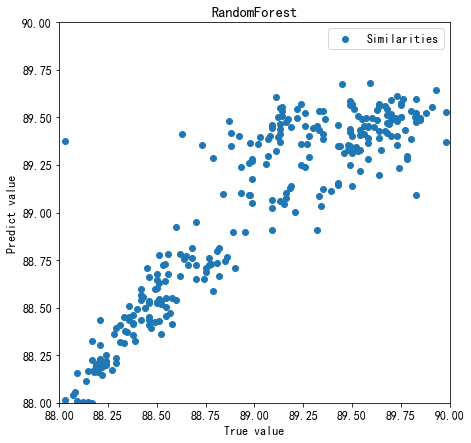

In [8]:
# 预测结果可视化
plt.style.use({'figure.figsize':(7,7)})
result = forest.predict(Xtest)
plt.figure()
plt.scatter(Ytest, result)
plt.xlim(88, 90)
plt.ylim(88, 90)
plt.xlabel('True value')
plt.ylabel('Predict value')
plt.title(f"RandomForest")
plt.legend(loc="best", labels = ['Similarities'])
plt.show()

In [9]:
rfr_score = forest.score(Xtest, Ytest)
print('rfr_score:',rfr_score.round(3))

from sklearn import metrics
rfr_rmse = metrics.mean_squared_error(Ytest,result) ** 0.5 # ,squared=False
print('rfr_rmse:',rfr_rmse.round(3))

rfr_score: 0.824
rfr_rmse: 0.236


### Batch processing

In [10]:
mid_plc_df =  original_plc_df.copy()

#半自磨浓度%
# pre.concentration(mid_plc_df)
pre.Normal(mid_plc_df.iloc[:,1:])

给料皮带G1_矿量反馈---偏度为-7.12;峰度为165.743
返料皮带F3_电流---偏度为-0.056;峰度为-0.861
返料皮带F3_矿量---偏度为1.683;峰度为5.046
半自磨_功率1---偏度为0.492;峰度为1.837
半自磨_功率2---偏度为0.506;峰度为1.872
半自磨_进料端总高压---偏度为0.835;峰度为-0.01
半自磨_出料端总高压---偏度为-0.652;峰度为-0.004
半自磨_给矿水流量反馈---偏度为1.895;峰度为9.623
半自磨_给矿水阀位---偏度为7.064;峰度为59.264
半自磨_排矿水流量---偏度为0.626;峰度为-0.524
直线筛_冲筛水流量---偏度为-0.751;峰度为0.137
一段泵池_液位---偏度为-3.641;峰度为21.708
一段泵池_补加水流量反馈---偏度为-0.537;峰度为0.436
一段渣浆泵1_电流---偏度为-0.505;峰度为1.172
一段渣浆泵1_矿浆流量反馈---偏度为0.022;峰度为1.073
一段旋流器1_压力---偏度为0.373;峰度为5.366
球磨机_功率1---偏度为-0.164;峰度为-0.422
球磨机_功率2---偏度为-0.156;峰度为-0.417
球磨机_进料端总高压---偏度为-0.172;峰度为-1.935
球磨机_出料端总高压---偏度为0.027;峰度为-0.414
球磨机_排矿水流量---偏度为0.973;峰度为0.723
球磨机_排矿水阀位---偏度为-0.661;峰度为-0.479


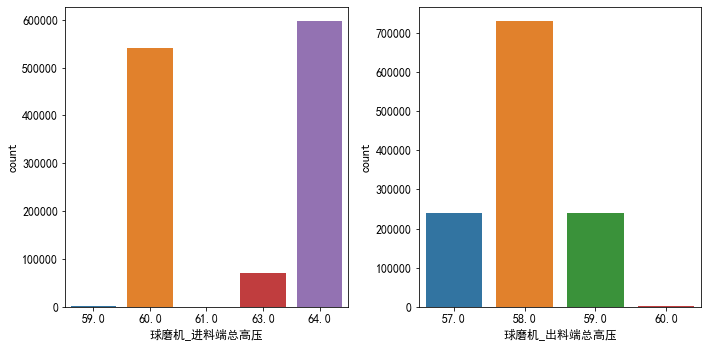

In [11]:
plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(original_plc_df['球磨机_进料端总高压'])
plt.subplot(1,2,2)
sns.countplot(original_plc_df['球磨机_出料端总高压'])

plt.tight_layout()

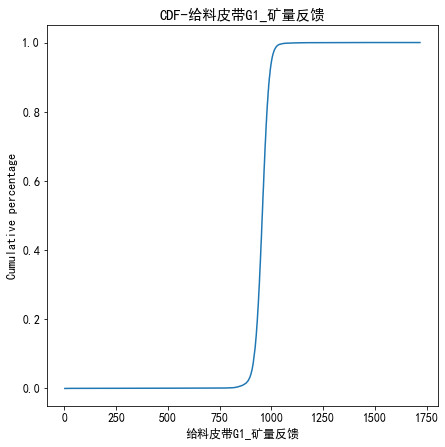

给料皮带G1_矿量反馈累计分布0.5%下界为840.61，99.5%上界为1040.33





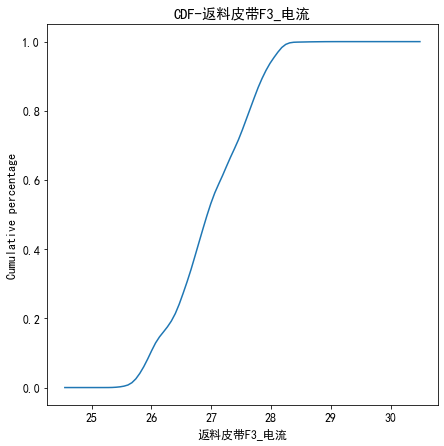

返料皮带F3_电流累计分布0.5%下界为25.61，99.5%上界为28.25





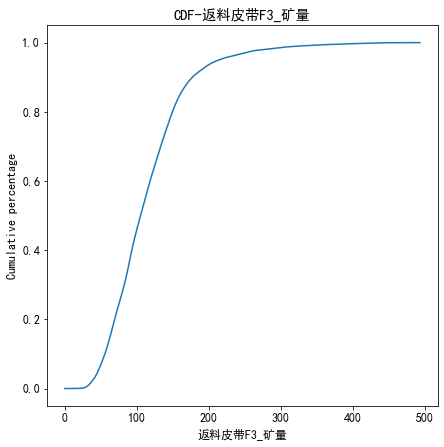

返料皮带F3_矿量累计分布0.5%下界为30.37，99.5%上界为373.54





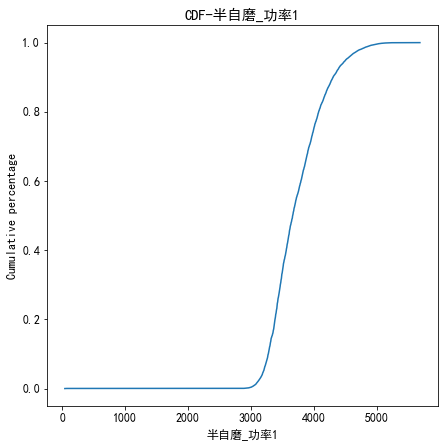

半自磨_功率1累计分布0.5%下界为3015.0，99.5%上界为4977.0





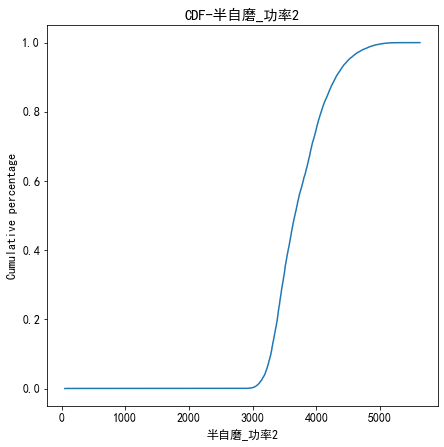

半自磨_功率2累计分布0.5%下界为3035.0，99.5%上界为4972.0





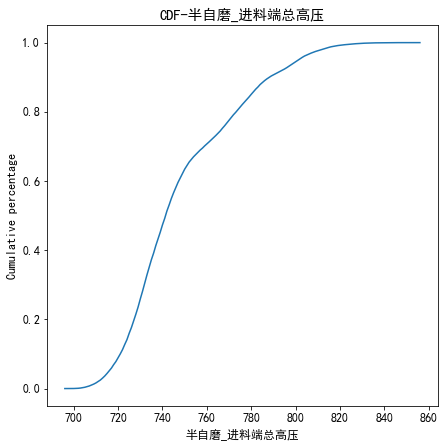

半自磨_进料端总高压累计分布0.5%下界为706.0，99.5%上界为823.0





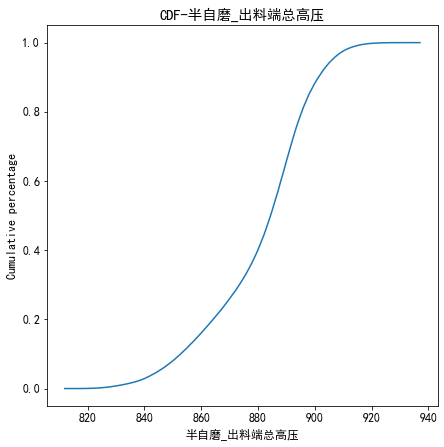

半自磨_出料端总高压累计分布0.5%下界为828.0，99.5%上界为916.0





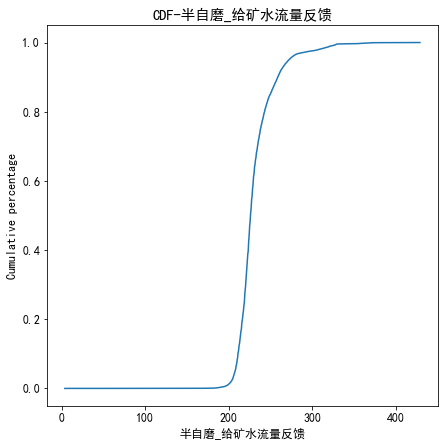

半自磨_给矿水流量反馈累计分布0.5%下界为193.52，99.5%上界为328.47





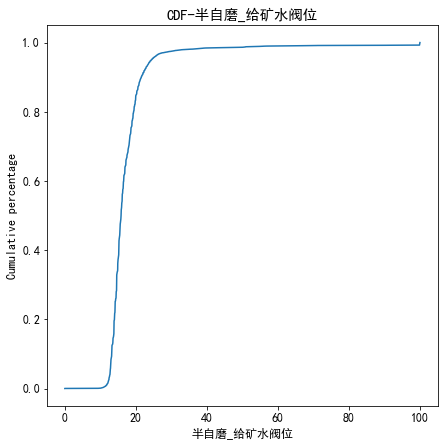

半自磨_给矿水阀位累计分布0.5%下界为11.2，99.5%上界为99.88





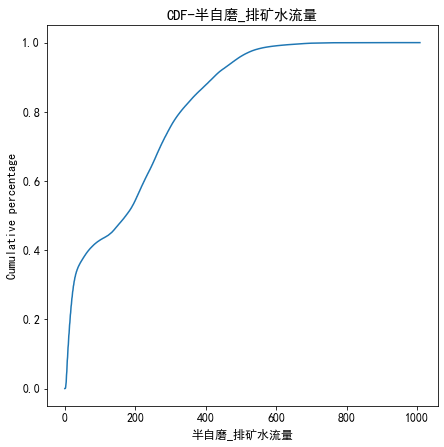

半自磨_排矿水流量累计分布0.5%下界为3.04，99.5%上界为645.4





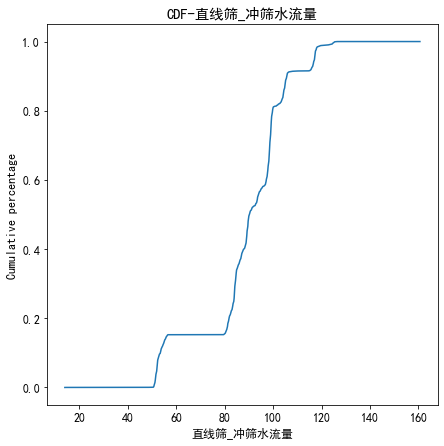

直线筛_冲筛水流量累计分布0.5%下界为50.93，99.5%上界为124.57





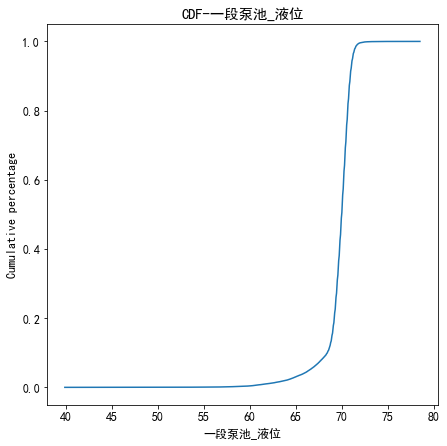

一段泵池_液位累计分布0.5%下界为60.36，99.5%上界为71.88





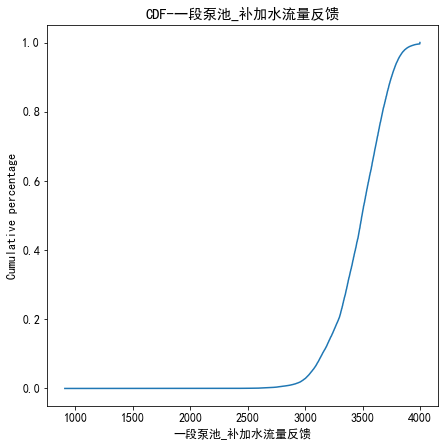

一段泵池_补加水流量反馈累计分布0.5%下界为2774.31，99.5%上界为3972.22





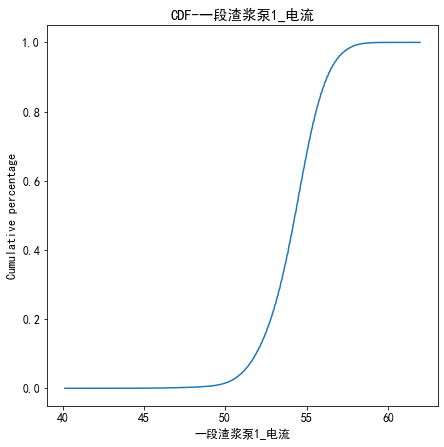

一段渣浆泵1_电流累计分布0.5%下界为48.72，99.5%上界为58.22





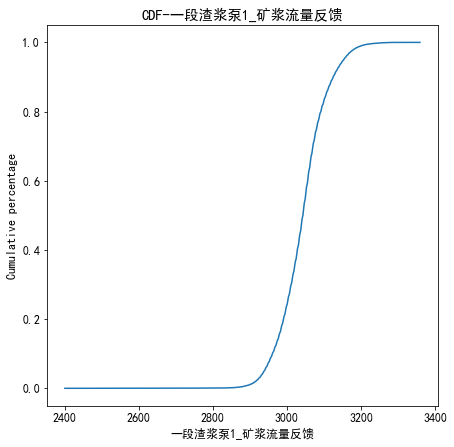

一段渣浆泵1_矿浆流量反馈累计分布0.5%下界为2881.42，99.5%上界为3219.27





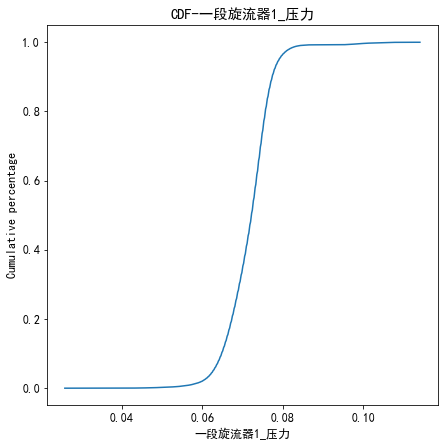

一段旋流器1_压力累计分布0.5%下界为0.05，99.5%上界为0.1





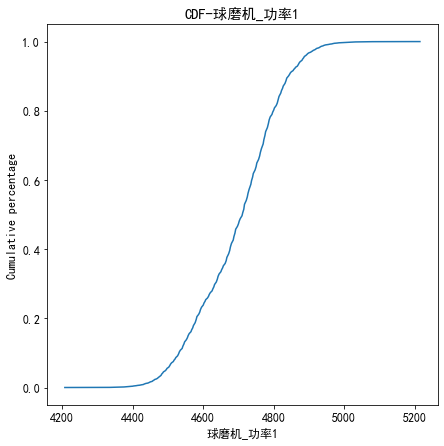

球磨机_功率1累计分布0.5%下界为4410.0，99.5%上界为4970.0





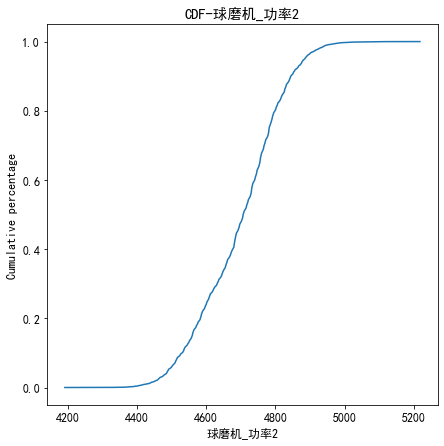

球磨机_功率2累计分布0.5%下界为4405.0，99.5%上界为4975.0





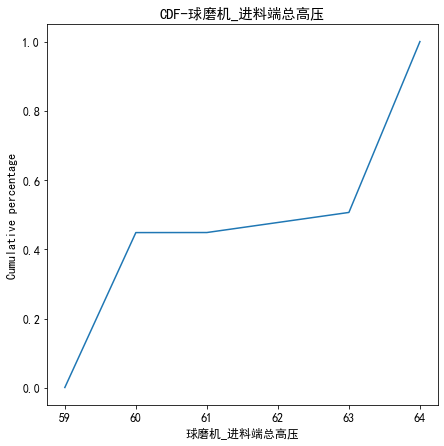

球磨机_进料端总高压累计分布0.5%下界为60.0，99.5%上界为63.0





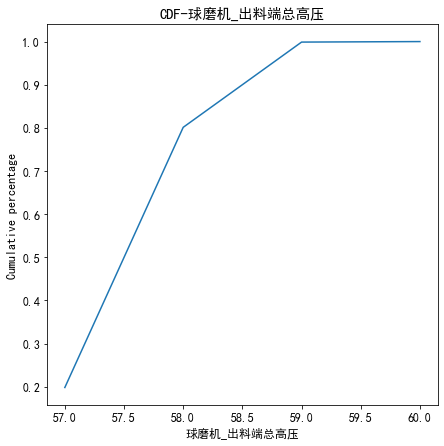

球磨机_出料端总高压累计分布0.5%下界为57.0，99.5%上界为58.0





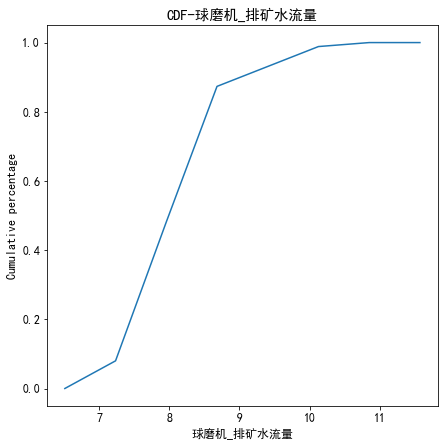

球磨机_排矿水流量累计分布0.5%下界为7.23，99.5%上界为10.13





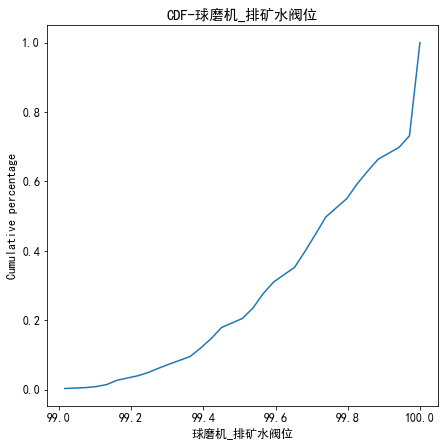

球磨机_排矿水阀位累计分布0.5%下界为99.07，99.5%上界为99.97





In [12]:
pre.cdf(mid_plc_df.iloc[:,1:])

In [13]:
minpoint_lst, maxpoint_lst = pre.minpoint_lst, pre.maxpoint_lst
minoutlen_lst = []
maxoutlen_lst = []

mid_plc = mid_plc_df.iloc[:,1:]
for i in range(len(mid_plc.columns)):
    maxout_df = mid_plc[mid_plc.iloc[:,i] > maxpoint_lst[i]]
    maxout_len = len(maxout_df)
    maxoutlen_lst.append(maxout_len)
    
    minout_df = mid_plc[mid_plc.iloc[:,i] < minpoint_lst[i]]
    minout_len = len(minout_df)
    minoutlen_lst.append(minout_len)
    
feature_lst = list(mid_plc.columns)

out_dic = {'特征':feature_lst, '下限值':minpoint_lst, '下限样本数量':minoutlen_lst, '上限值':maxpoint_lst, '上限样本数量':maxoutlen_lst}
out_df = pd.DataFrame(out_dic)
out_df

,特征,下限值,下限样本数量,上限值,上限样本数量
0,给料皮带G1_矿量反馈,840.61,6002,1040.33,6331
1,返料皮带F3_电流,25.61,8963,28.25,9588
2,返料皮带F3_矿量,30.37,5904,373.54,6079
3,半自磨_功率1,3015.00,5623,4977.00,6125
4,半自磨_功率2,3035.00,5966,4972.00,6184
5,半自磨_进料端总高压,706.00,4488,823.00,6626
6,半自磨_出料端总高压,828.00,4937,916.00,7852
7,半自磨_给矿水流量反馈,193.52,6196,328.47,6707
8,半自磨_给矿水阀位,11.20,6176,99.88,8815
9,半自磨_排矿水流量,3.04,7705,645.40,6064


In [14]:
mid_plc_df = pre.outilers(mid_plc_df,minpoint_lst,maxpoint_lst)

In [15]:
# outcome_col = '1系列原矿处理量t/h'
# outcome_col = '1系列返矿量t/h'
# outcome_col = '1系列1段旋流器A组溢流浓度/%'
# outcome_col = '1系列强磁尾矿品位TFe/%'
outcome_col = '1系列1段旋流器A组溢流粒度/-200目'

# target_cols = ['半自磨_功率1', '半自磨_功率2', '球磨机_功率1', '球磨机_功率2']
# target_cols = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '半自磨_进料端总高压','一段泵池_液位', '一段渣浆泵1_矿浆流量反馈', '一段渣浆泵2_矿浆流量反馈','一段旋流器1_压力', '球磨机_出料端总高压']
target_cols = ['给料皮带G1_矿量反馈', '返料皮带F3_矿量', '半自磨_功率1', '一段泵池_液位', '一段渣浆泵1_电流', '一段旋流器1_压力', '球磨机_功率1']
shifting_labels = ['平均值时间范围（分钟）', '时间戳移动量（分钟）']

huayan_df = original_huayan_df[['时间'] + [outcome_col]].copy()

all_shifted_df = []

for group_time_min in (0.5, 1, 5, 10, 15):
    for shifted_time_min in (0, 1, 5, 10, 20, 30, 60):
        if (group_time_min / 2) > shifted_time_min:
            continue
        plc_df = mid_plc_df[['时间'] + target_cols].copy()

        plc_df.loc[:, '时间'] = plc_df.loc[:, '时间'] - timedelta(minutes=shifted_time_min)
        plc_df.loc[:, '时间'] = plc_df.loc[:, '时间'].dt.round(f'{group_time_min}min')

        plc_df = plc_df.groupby("时间").mean().reset_index()

        shifted_corr_single_df = huayan_df.merge(plc_df, how="left", on="时间").dropna().corr().loc[[outcome_col], target_cols].abs().round(2)
        shifted_corr_single_df[shifting_labels] = (group_time_min, shifted_time_min)
        
        all_shifted_df.append(shifted_corr_single_df)
all_shifted_df = pd.concat(all_shifted_df).reset_index(drop=True)

对于给料皮带G1_矿量反馈, 使用10分钟之前，前后共5分钟数据的平均值 (相关系数绝对值: 0.170)


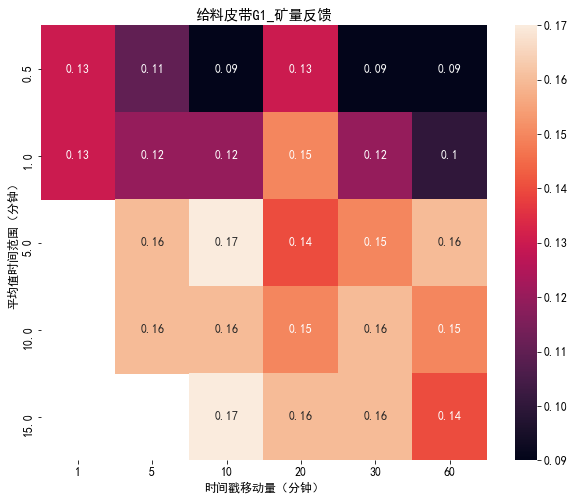





对于返料皮带F3_矿量, 使用60分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.210)


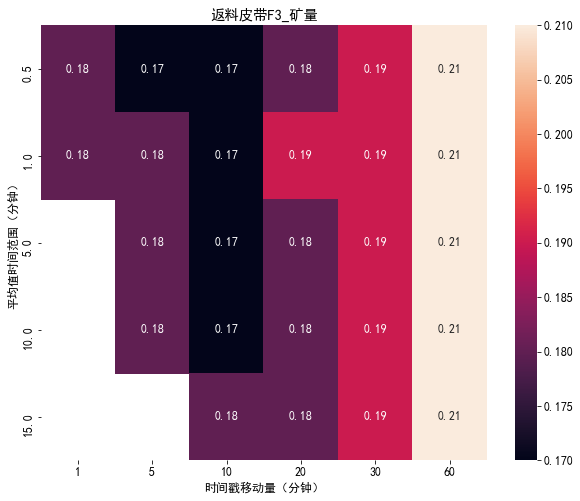





对于半自磨_功率1, 使用5分钟之前，前后共5分钟数据的平均值 (相关系数绝对值: 0.200)


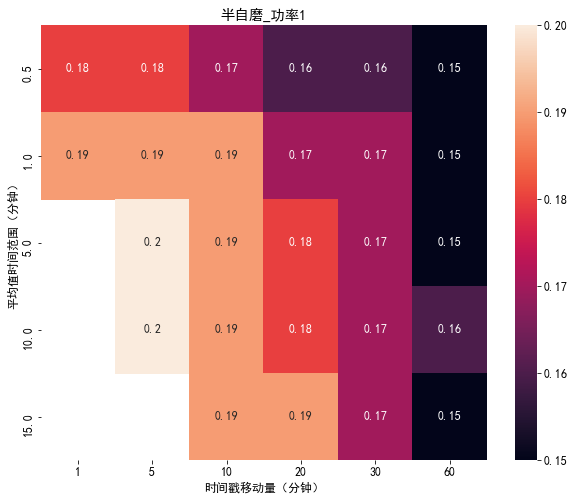





对于一段泵池_液位, 使用1分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.050)


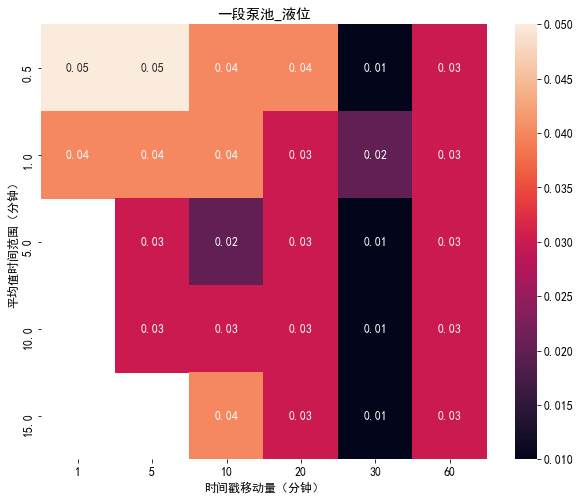





对于一段渣浆泵1_电流, 使用10分钟之前，前后共10分钟数据的平均值 (相关系数绝对值: 0.190)


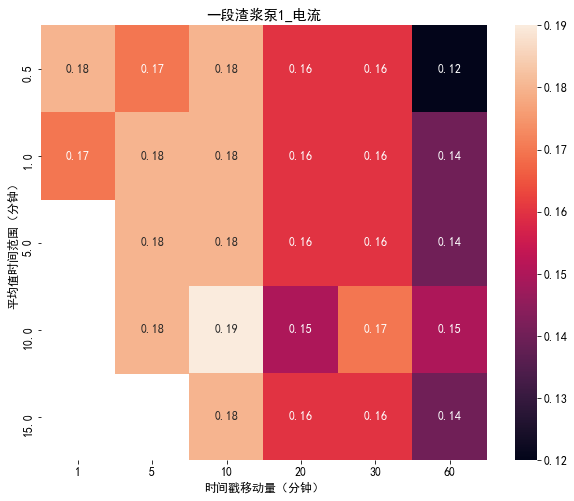





对于一段旋流器1_压力, 使用60分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.240)


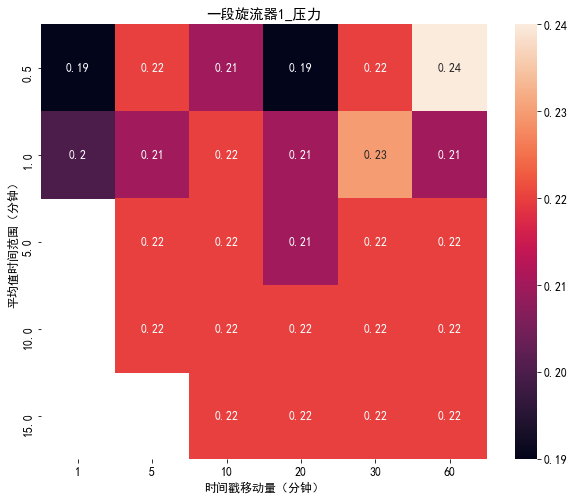





对于球磨机_功率1, 使用1分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.050)


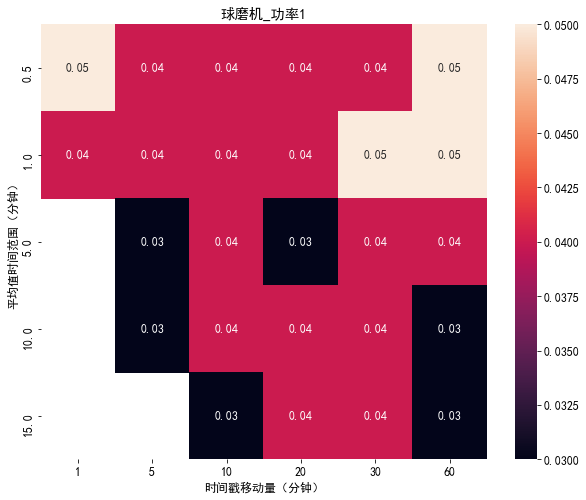

In [16]:
for corr_col in target_cols:
    plt.figure(figsize=(10, 8))
    pivoted_hm_df = pd.pivot_table(all_shifted_df, values=corr_col, index=shifting_labels[0], columns=shifting_labels[1])
    sns.heatmap(pivoted_hm_df, annot=True)
    plt.title(corr_col)
    
    group_time_min, shifted_time_min, corr_val = all_shifted_df.loc[all_shifted_df[corr_col].idxmax(), shifting_labels + [corr_col]]
    print(f"对于{corr_col}, 使用{shifted_time_min:g}分钟之前，前后共{group_time_min:g}分钟数据的平均值 (相关系数绝对值: {corr_val:.3f})")
    plt.show()
    print("\n"*3)

In [17]:
pre.concentration(mid_plc_df)
mid_plc_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,半自磨浓度%
1,2022-02-24 15:19:08,928.551147,27.653999,113.571762,3485.0,3435.0,752.0,884.0,270.138855,21.006943,...,57.527489,3118.402832,0.080208,4497.0,4462.0,63.0,58.0,8.680555,99.305557,78.708717
2,2022-02-24 15:19:14,904.703979,27.719997,112.251160,3365.0,3452.0,756.0,884.0,268.750000,21.006943,...,55.855034,3123.263672,0.077170,4420.0,4522.0,63.0,58.0,7.957175,99.363419,78.394474
4,2022-02-24 15:19:47,953.392090,27.653999,117.722214,3570.0,3412.0,756.0,876.0,266.435181,20.601852,...,56.740448,3137.847168,0.081250,4422.0,4487.0,63.0,58.0,7.957175,99.363419,79.368597
5,2022-02-24 15:19:55,996.118408,27.719997,119.042816,3525.0,3432.0,753.0,882.0,266.666687,20.659721,...,55.953415,3152.430664,0.079167,4420.0,4487.0,63.0,58.0,10.127314,99.363419,79.984373
6,2022-02-24 15:20:01,944.946167,27.719997,119.042816,3475.0,3435.0,759.0,890.0,265.509216,21.614582,...,55.953415,3160.937500,0.078906,4522.0,4430.0,63.0,57.0,8.680555,99.363419,79.318069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210812,2022-05-29 11:39:59,958.360229,28.181999,151.869202,3217.0,3202.0,718.0,834.0,226.851837,19.589119,...,55.707458,2984.722168,0.069618,4862.0,4857.0,60.0,57.0,8.680555,99.971054,82.294240
1210813,2022-05-29 11:40:04,972.271118,28.115997,150.925903,3175.0,3097.0,717.0,834.0,226.851837,19.704861,...,55.018806,2994.444336,0.068750,4872.0,4875.0,60.0,57.0,8.680555,99.971054,82.455705
1210814,2022-05-29 11:40:09,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000,82.767475
1210815,2022-05-29 11:40:14,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000,82.767475


In [18]:
df0 = mid_plc_df[['时间','给料皮带G1_矿量反馈']]
df1 = mid_plc_df[['时间','返料皮带F3_电流', '返料皮带F3_矿量']]
df2 = mid_plc_df[['时间','半自磨_功率1', '半自磨_功率2','半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', 
                       '半自磨_给矿水阀位','半自磨_排矿水流量', '半自磨浓度%', '直线筛_冲筛水流量']]
df3 = mid_plc_df[['时间','一段泵池_液位', '一段泵池_补加水流量反馈']]
df4 = mid_plc_df[['时间','一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈']]

df5 = mid_plc_df[['时间','一段旋流器1_压力']]
df6 = mid_plc_df[['时间','球磨机_功率1','球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位']]

In [19]:
df_set = [df0,df1,df2,df3,df4,df5,df6]
shift = [10,20,10,5,5,5,1]
freq = ['5min','5min','5min','5min','5min','5min','1min']
for i in range(7):
    lll = len(df_set[i].columns)
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'] - timedelta(minutes=shift[i])
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'].dt.round(freq[i])
    df_set[i] = df_set[i].groupby("时间").mean().reset_index()
    df_set[i] = df_set[i].merge(original_huayan_df, how="left", on="时间").dropna(axis = 0,how = 'any')

    df_set[i] = df_set[i].iloc[:,:lll]
    df_set[i].reset_index(inplace=True,drop=True)

In [20]:
from functools import reduce

df_list = [df_set[0],df_set[1],df_set[2],df_set[3],df_set[4],df_set[5],df_set[6], original_huayan_df]
mid_df = reduce(lambda left, right: pd.merge(left, right, on=['时间']), df_list)
mid_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%,1系列1段旋流器A组溢流粒度/-200目
0,2022-02-26 17:00:00,957.993510,27.528286,66.349009,3521.738095,3535.261905,747.642857,876.833333,211.838611,15.186838,...,2948.678067,0.070038,4520.888889,4511.333333,64.0,58.000000,8.519804,99.421295,19.81,88.63
1,2022-02-26 23:00:00,964.265569,25.764557,53.034667,3452.795455,3437.045455,743.681818,876.250000,206.150036,13.085279,...,2953.238815,0.070733,4565.250000,4564.750000,63.0,58.000000,8.590132,99.276611,20.46,88.86
2,2022-02-27 01:00:00,956.906566,25.727428,69.646022,3576.814815,3596.814815,753.185185,883.740741,211.754106,13.916752,...,2954.401001,0.068412,4543.333333,4554.833333,64.0,58.000000,8.318865,99.218750,18.02,89.41
3,2022-02-27 03:00:00,957.932719,25.945673,55.228357,3458.255814,3472.093023,749.255814,881.046512,206.546075,13.852551,...,2948.177025,0.070387,4541.888889,4535.222222,63.0,58.000000,8.198302,99.160873,20.06,88.50
4,2022-02-27 05:00:00,957.138306,25.800789,54.338296,3446.162162,3470.621622,750.594595,884.810811,207.864102,13.895927,...,2941.848258,0.069239,4537.000000,4546.250000,63.0,58.000000,7.957175,99.103012,20.54,88.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,2022-05-25 11:00:00,958.668596,27.629800,121.589695,3158.068966,3160.775862,723.689655,845.741379,219.879462,17.582614,...,3098.046753,0.076612,4824.500000,4814.916667,60.0,57.750000,8.198302,99.739578,20.73,88.49
881,2022-05-25 13:00:00,954.963937,26.931355,138.807078,3211.360656,3218.213115,723.409836,845.393443,223.850175,18.609592,...,3044.509806,0.073382,4791.083333,4792.833333,60.0,57.166667,9.042245,99.922836,20.62,88.47
882,2022-05-25 15:00:00,961.155861,27.608482,200.217546,3456.050847,3448.000000,730.762712,853.288136,234.161164,20.183517,...,2993.332031,0.070018,4856.666667,4833.833333,60.0,57.000000,8.559992,100.000000,20.97,88.24
883,2022-05-25 17:00:00,961.597809,27.947698,156.689400,3235.133333,3232.433333,722.333333,842.650000,229.359573,19.551022,...,2999.021859,0.069097,4815.750000,4858.000000,60.0,57.000000,8.379147,100.000000,20.99,88.21


In [21]:
mid_df["球磨机_进料端总高压"] = list(map(int, mid_df["球磨机_进料端总高压"]))
mid_df["球磨机_出料端总高压"] = list(map(int, mid_df["球磨机_出料端总高压"]))

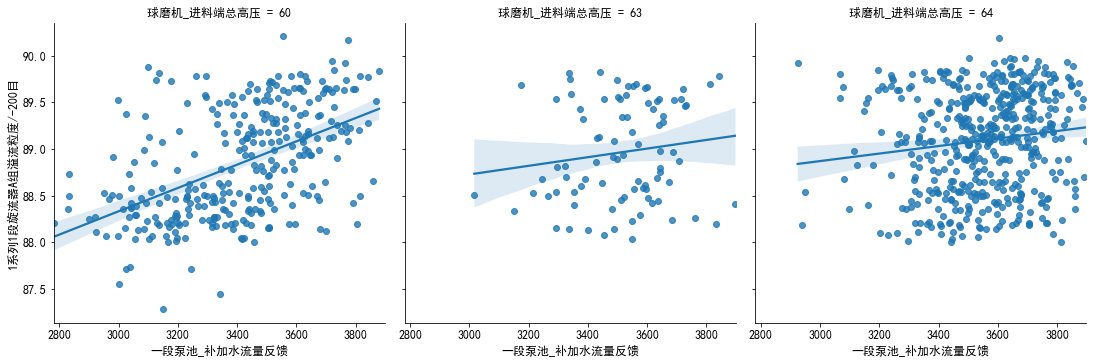

In [22]:
sns.lmplot(x="一段泵池_补加水流量反馈", y="1系列1段旋流器A组溢流粒度/-200目", 
           data=mid_df, col="球磨机_进料端总高压", col_wrap=4, aspect=1) 

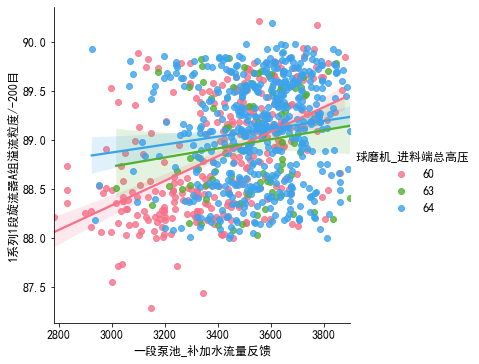

In [23]:
sns.lmplot(x="一段泵池_补加水流量反馈", y="1系列1段旋流器A组溢流粒度/-200目", 
           data=mid_df, hue="球磨机_进料端总高压", palette="husl") 

In [24]:
mid_df.columns

Index(['时间', '给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2',
       '半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量',
       '半自磨浓度%', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流',
       '一段渣浆泵1_矿浆流量反馈', '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压',
       '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位', '1系列1段旋流器A组溢流浓度/%',
       '1系列1段旋流器A组溢流粒度/-200目'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler

target = mid_df['1系列1段旋流器A组溢流粒度/-200目']
regressors = [x for x in mid_df.columns if x not in ['时间','1系列1段旋流器A组溢流粒度/-200目']]
features = mid_df[regressors] 
features=StandardScaler().fit_transform(features) #进行标准化处理
features = pd.DataFrame(features)
c = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2',
       '半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量',
       '半自磨浓度%', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流',
       '一段渣浆泵1_矿浆流量反馈', '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压',
       '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位', '1系列1段旋流器A组溢流浓度/%']
features.columns = c
features.head()

,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,半自磨_排矿水流量,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%
0,0.204147,0.822126,-0.892155,-0.596664,-0.562108,0.019247,-0.319569,-1.009102,-0.366092,-0.979092,...,-1.903018,-1.699238,-0.484225,-1.664609,-1.766512,0.804838,0.005646,0.025465,-1.200564,-0.030342
1,0.714709,-1.731798,-1.185654,-0.775918,-0.818213,-0.143483,-0.356678,-1.342411,-1.074111,1.035032,...,-1.690836,-1.616526,-0.325823,-1.220339,-1.230486,0.266454,0.005646,0.167895,-1.782391,0.743343
2,0.115667,-1.785562,-0.819476,-0.453462,-0.401605,0.246942,0.119856,-1.014053,-0.793986,1.109756,...,-1.996893,-1.595449,-0.855087,-1.439831,-1.329998,0.804838,0.005646,-0.381479,-2.015071,-2.160954
3,0.199199,-1.469537,-1.137296,-0.761721,-0.726825,0.085512,-0.051541,-1.319206,-0.815615,1.235506,...,-1.628674,-1.708325,-0.404721,-1.454297,-1.526791,0.266454,0.005646,-0.625645,-2.247815,0.267229
4,0.134531,-1.679334,-1.156917,-0.793165,-0.730662,0.140513,0.187930,-1.241979,-0.801002,0.597118,...,-1.790611,-1.823102,-0.666534,-1.503258,-1.416130,0.266454,0.005646,-1.113977,-2.480495,0.838566


In [27]:
#分割训练集测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size = 0.3,random_state=seed)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=seed)
forest.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=123)

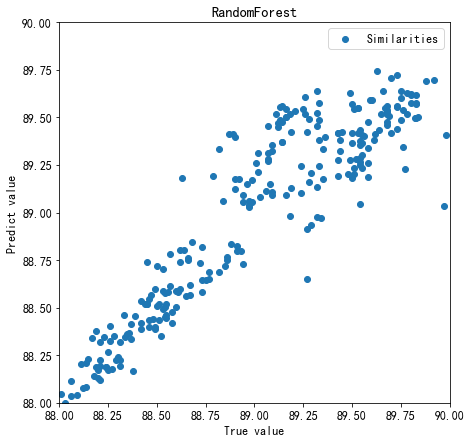

In [28]:
# 预测结果可视化
plt.style.use({'figure.figsize':(7,7)})
result = forest.predict(Xtest)
plt.figure()
plt.scatter(Ytest, result)
plt.xlim(88, 90)
plt.ylim(88, 90)
plt.xlabel('True value')
plt.ylabel('Predict value')
plt.title(f"RandomForest")
plt.legend(loc="best", labels = ['Similarities'])
plt.show()

In [29]:
rfr_score = forest.score(Xtest, Ytest)
print('rfr_score:',rfr_score.round(3))

from sklearn import metrics
rfr_rmse = metrics.mean_squared_error(Ytest,result) ** 0.5
print('rfr_rmse:',rfr_rmse.round(3))

rfr_score: 0.847
rfr_rmse: 0.216


In [30]:
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin

In [77]:
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss,random_state=seed)
    model.fit(Xtrain,Ytrain)
    pred=model.predict(Xtest)
    score=metrics.mean_squared_error(Ytest,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',3,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500)
    return best

trial=Trials()
best=optimize(trial)
best = dict(zip(list(best.keys()), list(map(lambda x: round(x), best.values()))))
best

100%|█████████████████████████████████████████████| 500/500 [05:40<00:00,  1.47trial/s, best loss: 0.04498231626014669]


{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 123}

In [78]:
best

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 123}

In [79]:
rfr_opt = RandomForestRegressor(n_estimators=123,max_depth=6,min_samples_split=2,min_samples_leaf=2, random_state=seed)
rfr_opt.fit(Xtrain,Ytrain)
pred_rfr_opt = rfr_opt.predict(Xtest)
rfr_rmse = metrics.mean_squared_error(Ytest, pred_rfr_opt) ** 0.5
rfr_score = rfr_opt.score(Xtest, Ytest)
print('rfr_score:', rfr_score.round(3))
print('rfr_rmse:', rfr_rmse.round(3))

rfr_score: 0.849
rfr_rmse: 0.214


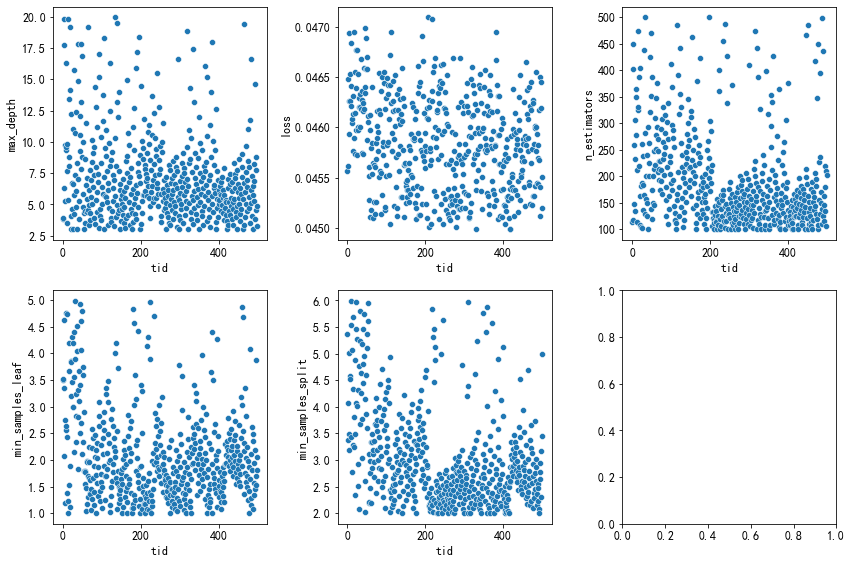

In [86]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})

plt.subplots(2,3,figsize=(12,8))
plt.subplot(2,3,1)
sns.scatterplot(x='tid',y='max_depth',data=hyperopt_rfr)
plt.subplot(2,3,2)
sns.scatterplot(x='tid',y='loss',data=hyperopt_rfr)
plt.subplot(2,3,3)
sns.scatterplot(x='tid',y='n_estimators',data=hyperopt_rfr)
plt.subplot(2,3,4)
sns.scatterplot(x='tid',y='min_samples_leaf',data=hyperopt_rfr)
plt.subplot(2,3,5)
sns.scatterplot(x='tid',y='min_samples_split',data=hyperopt_rfr)

plt.tight_layout()